<a href="https://colab.research.google.com/github/MohammedMoseena/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step-1: Understand the Business Intution Behind the Customer Churn Prediction**

Business related Questions

a. What is effect of churn prediction on business:
1. Reduce Revenue Loss
2. Cut Marketing Costs
3. Improve Customer Experience
4. Enable Smart Campaigns
5. Drive Business Growth

b. What is effect of churn prediction on end users/customers:
1. Proactive Support
2. Personalised offers
3. Tailored Plans
4. Better Experience
5. Less Spam

c. What is effect of churn prediction on internal staff/stakeholders:
1. Reduce Work load.
2. Helps in prioritizing customers.

d. In the first place what is the criteria to defin churn?
1. Churn - Yes --> Person  left/cancelled service
2. Churn - No --> Person has not left/cancelled service
The dependent variable/ target in current dataset is "Churn".

e. What is impact of incorrect predictions on Business?
1. False Negative: If Churn customer is being predicted by model as not churn which is known as False Negative,  It is  major issue because it will lead to lost revenue, missed opportunity, no learning and reduce trust.
2. False Positive: If non churn customer is predicted by model as churn then it is known as False Positive, FP in this case is less severe than FN but it leads to unnecessary cost, confused customer and retention team burdened.

f. Any Basine Model to compare sucess?

g. Is ML really needed or simple rule based is enough for this problem or if ML is needed it should be hybrid (ML+Human based)?

h. Applying ML on the current dataset is ethical?


Technical Requirments

1. Which of the below is the requirement for this Model
    
    a. High Accuracy
    b. Low Latency
    c. High Interpretability
    d. High Throughput Requirement

Generally for Churn prediction we need High accuracy, we are not concerned with latency because churn prediction is batch prediction and having interpretability is nice to have but not critical, and model should have high throuput because Telcos have millions of customers → model should scale to score all of them efficiently in batch.


**Step-2: Establish Metrics**

Generally for classification problem we have metrics like accuracy, precision, recall, F1 score, ROC, AUC. When we have imbalanced dataset we cannot go with accuracy metric, We need to  choose precision or recall, but most of time we need balance between precision and recall so we look at F1score. ROC curve helps to set best threshoulds for particular model, AUC helps for comparing different models, AUC is also best metric


Align Evaluation Metric with Business KPI, For example based on F1 score we should be able to tell how much revenue loss is been saved.

**Step-3: Understand the Datasource.**
1. Understand what data is available in given dataset
2. What is shape of dataset

In [1]:
# Import libraries
import time
import psutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [3]:
# To view all columns
pd.set_option("display.max_columns", None)
# Load the dataset from csv into dataframe
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding about dataset

a. Given dataset has 7043 rows and 21 columns

b. Target/ Dependent Variable - Churn: Whether the customer churned or not (Yes or No)

c. Coming to features
  1. customer_id: unique id for each customer
  2. gender: Whether the customer is a male or a female
  3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
  4. Partner: Whether the customer has a partner or not (Yes, No)
  5. Dependents: Whether the customer has dependents or not (Yes, No)
  6. tenure: Number of months the customer has stayed with the company
  7. PhoneService: Whether the customer has a phone service or not (Yes, No)
  8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
  9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
  10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
  11. OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
  12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
  13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
  14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
  15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
  16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
  17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
  18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  19. MonthlyCharges: The amount charged to the customer monthly
  20. TotalCharges: The total amount charged to the customer


**Step-4: Exploratory Data Analysis**
1. Profile the columns

  a. Check column types

  b. Drop ID/uninformative features

  c. Detect no-variance columns

  d. Identify missing values

  e. Flag noisy or invalid entries

2. Look at Summary Statistics

3. Visualize Data

  a. Histogram: Numerical columns--> Distribution is skew--> Log transform or normalize

  b. Bar chart: Categorical columns-->Frequency of categories-->Detect Imbalance

  c. Boxplot: Outliers and distribution comparison
  
  d. Understand shape, skew, outliers, feature engineering needs

In [7]:
# a. Check column types
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Numerical columns: SeniorCitizen, tenure, MonthlyCharges

Categorical columns: customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup
, DeviceProtection, TechSupport	, StreamingTV	, StreamingMovies	, Contract	, PaperlessBilling	, PaymentMethod, Total Charges, Churn

My Observations:
1. Total Charges can be converted to float as MonthlyCharges is float64

In [8]:
# b. Drop ID/uninformative features
for col in df.columns:
  # print("Column Name:", col)
  # print("Unique Values:",df[col].unique())
  # print("Count of Unique Values:", len(df[col].unique()))
  # print('-'*50)
  if len(df[col].unique())==1:
    print("No variance Column:", col)
  if len(df[col].unique())==len(df):
    print("unique value column:", col)



unique value column: customerID


In [9]:
# Machine learning models work by finding patterns in the data.
# But customerID has no pattern, no relationship, and no variance that helps predict churn — it's just a random label.
df.drop(columns=['customerID'], inplace=True)

In [10]:
#d. Identify missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
# Flag noisy or invalid entries
for col in df.columns:
  print("Column Name:", col)
  print("Unique Values:",df[col].unique())
  print("Count of Unique Values:", len(df[col].unique()))
  print('-'*50)

Column Name: gender
Unique Values: ['Female' 'Male']
Count of Unique Values: 2
--------------------------------------------------
Column Name: SeniorCitizen
Unique Values: [0 1]
Count of Unique Values: 2
--------------------------------------------------
Column Name: Partner
Unique Values: ['Yes' 'No']
Count of Unique Values: 2
--------------------------------------------------
Column Name: Dependents
Unique Values: ['No' 'Yes']
Count of Unique Values: 2
--------------------------------------------------
Column Name: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Count of Unique Values: 73
--------------------------------------------------
Column Name: PhoneService
Unique Values: ['No' 'Yes']
Count of Unique Values: 2
--------------------------------------------------
Column Name: MultipleL

In [12]:
# For Total Charges we are having 6531 unique values and these are string values
# While dealing string values be careful with empty strings('') and blank strings(' ')
# for a string column always check if we have empty strings or blank strings
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Note: Total Charges have blank string for those whose tenure is 0

In [13]:
# Total Charges can be converted to float
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})
df["TotalCharges"]=df["TotalCharges"].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
#2. Look at Summary Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


For Total Charges Mean=2279>>Median=1394 which means Total Charges distribution can be skew

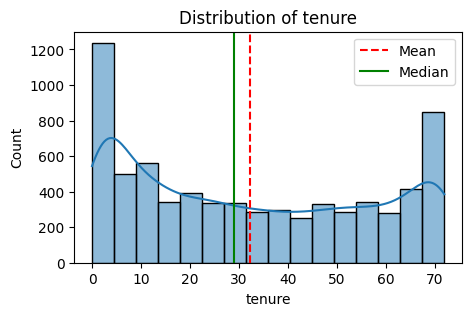

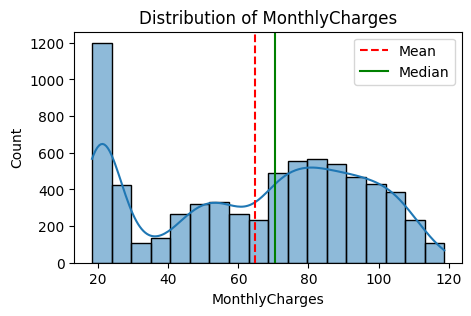

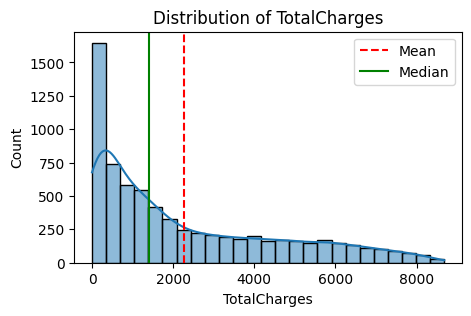

In [15]:
# a. Histogram: Numerical columns--> Distribution is skew--> Log transform or normalize
numeric_features=['tenure', 'MonthlyCharges', 'TotalCharges'] #SeniorCitizen	is numeric but it is encoded version of categorical variable which have only two values which can be visualised using bar graph
for column_name in numeric_features:
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean=df[column_name].mean()
  col_median=df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()
  plt.show()

Total Charges is having skewed distribution


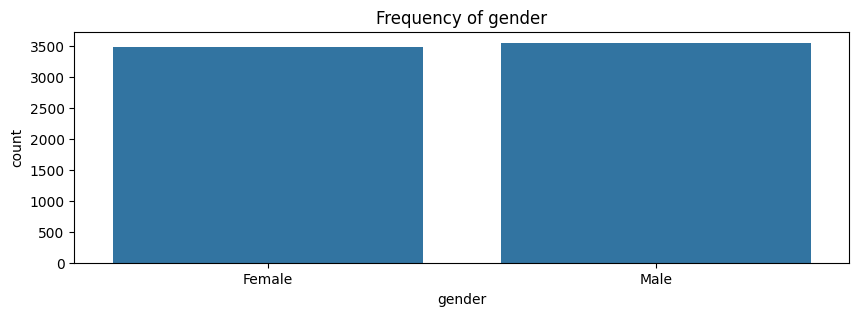

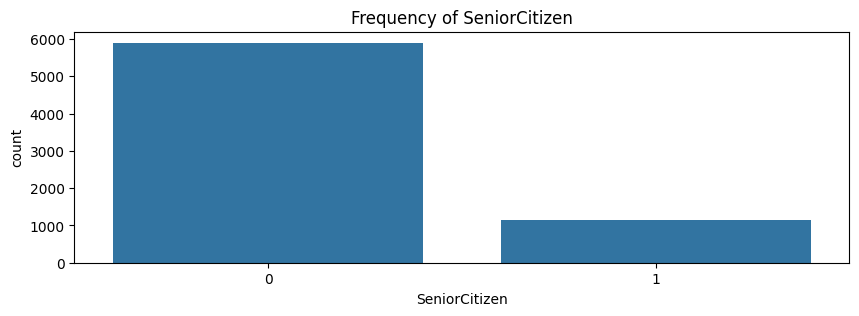

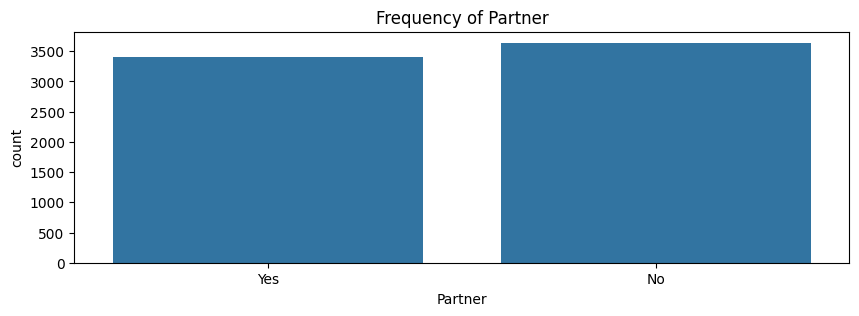

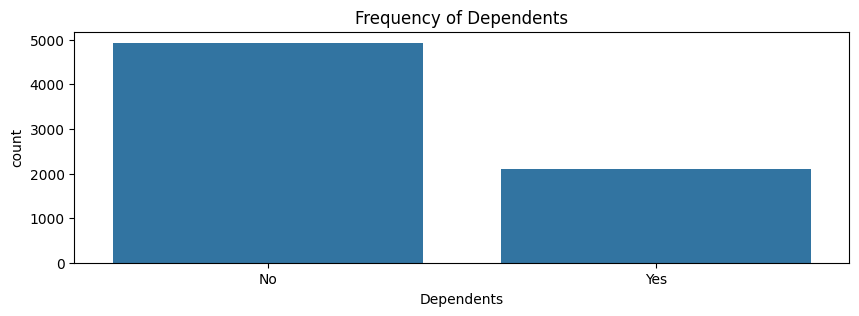

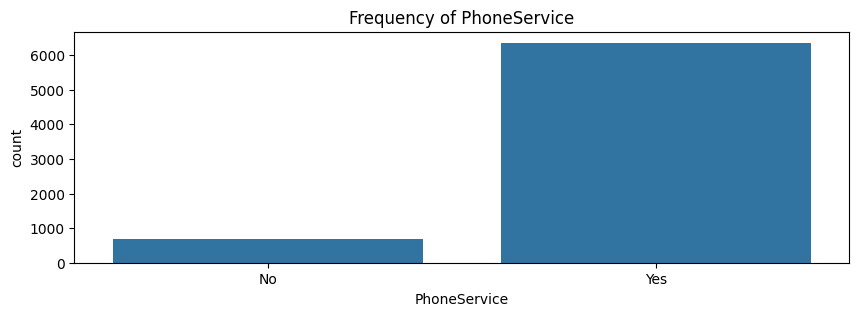

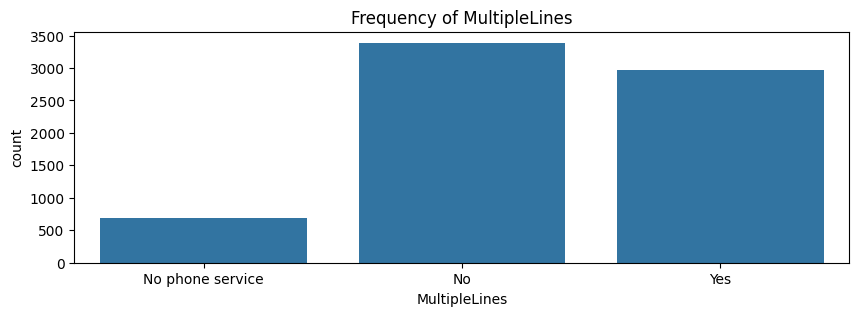

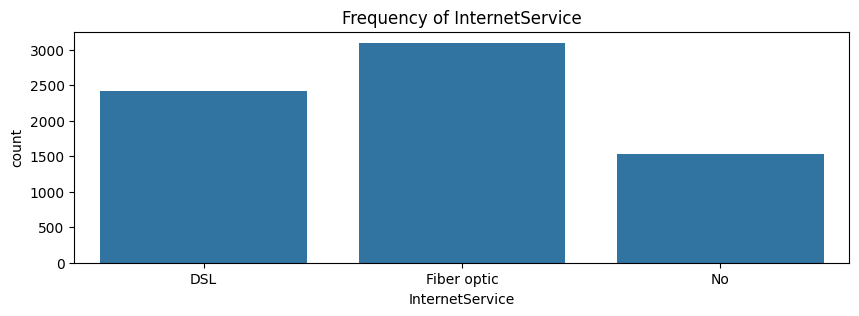

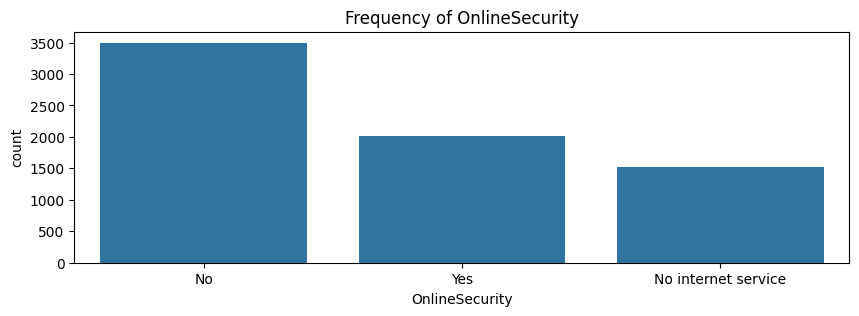

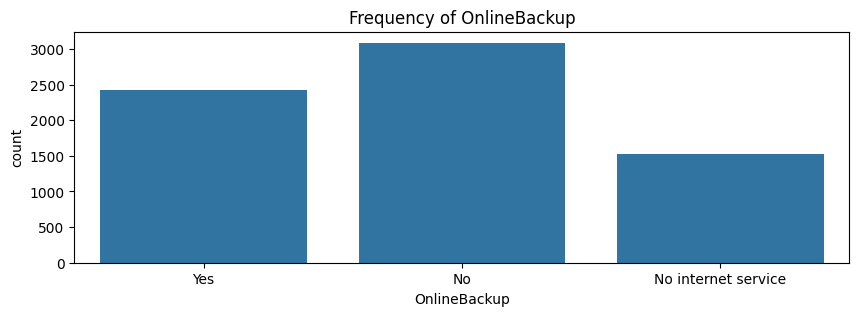

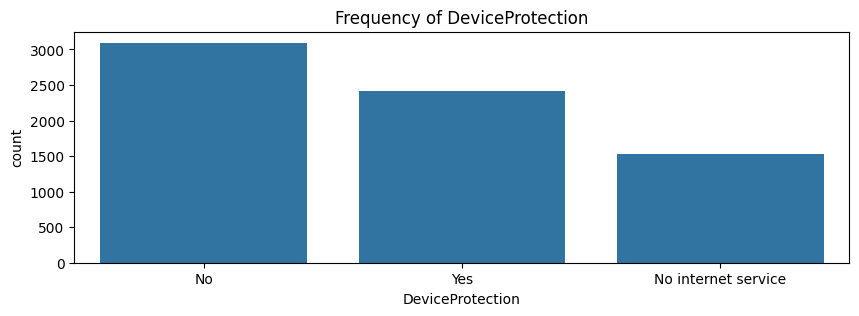

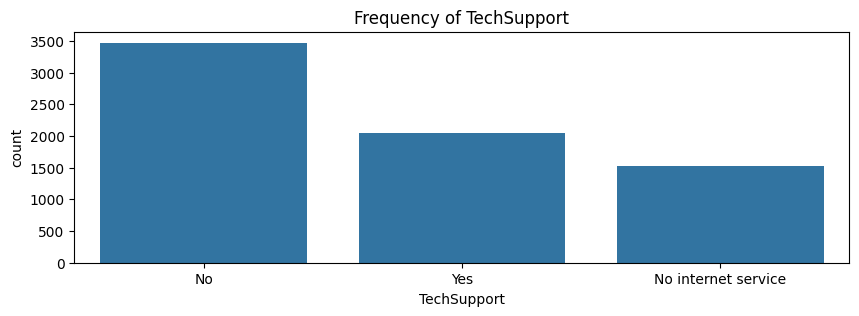

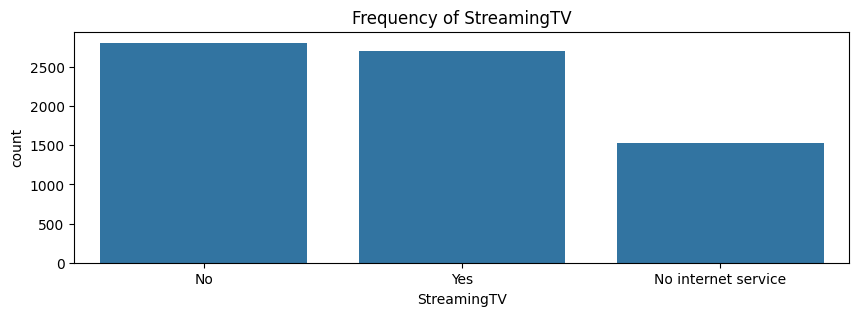

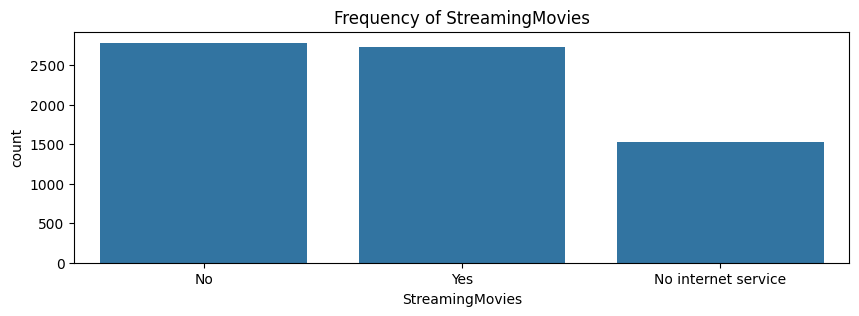

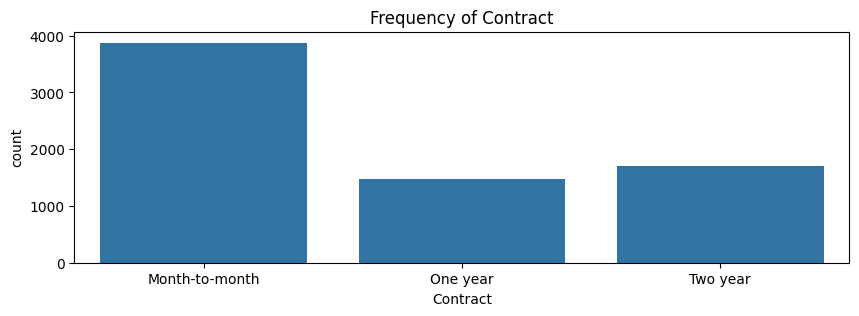

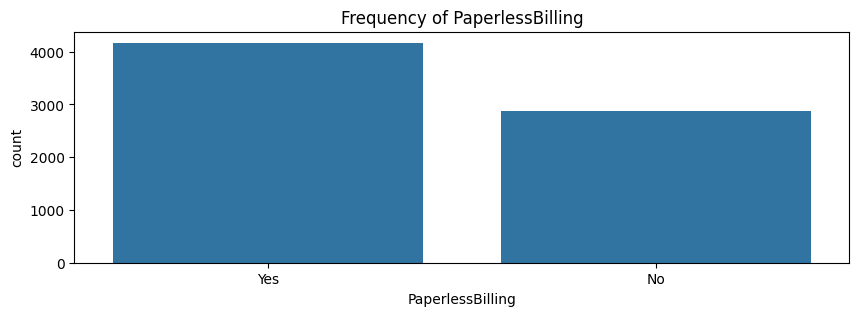

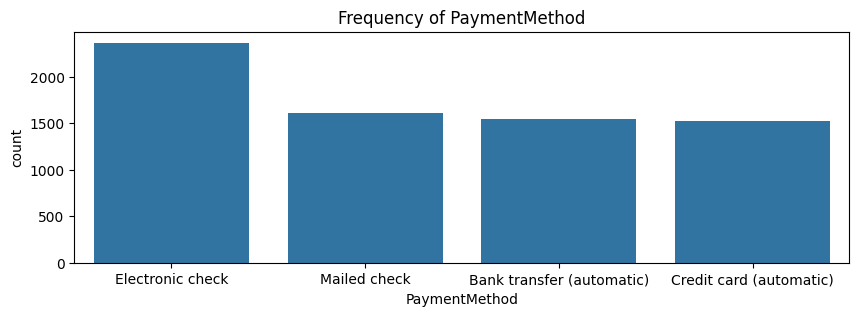

In [16]:
#Bar chart: Categorical columns-->Frequency of categories-->Detect Imbalance
categorical_features = [col for col in df.columns if col not in numeric_features and col != "Churn"]
for col in categorical_features:
    plt.figure(figsize=(10,3))
    sns.countplot(x=df[col])
    plt.title(f"Frequency of {col}")
    plt.show()

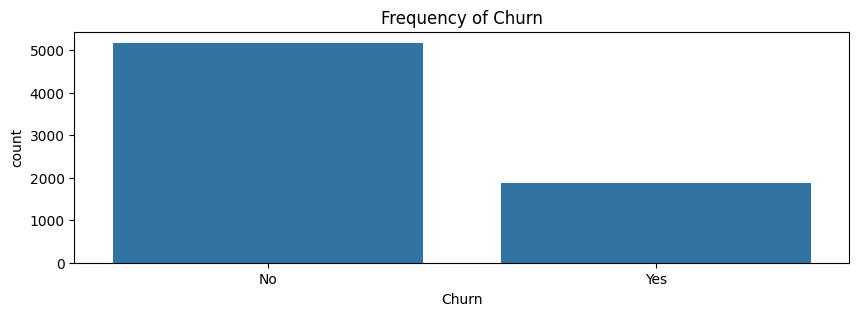

In [17]:
plt.figure(figsize=(10,3))
sns.countplot(x=df["Churn"])
plt.title(f"Frequency of Churn")
plt.show()

Most focus point here is Churn which is target column which has imbalance data, need to balance the target column, otherwise model predictions will be biased towards majority class, which in this case not churn which can lead to False Negative error which is risky to business

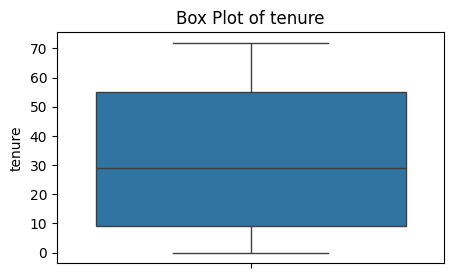

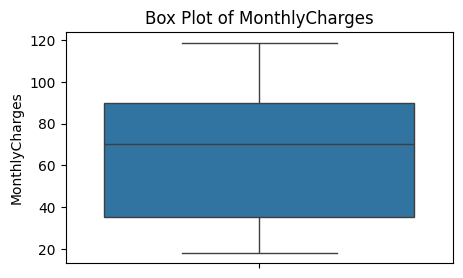

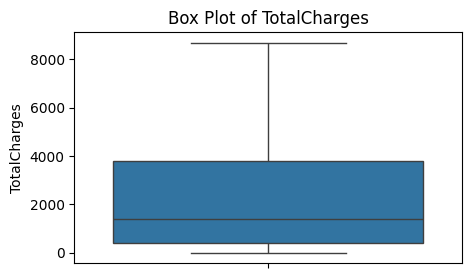

In [18]:
# Boxplot: Outliers and distribution comparison
for col in numeric_features:
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[col])
  plt.title(f"Box Plot of {col}")
  plt.ylabel(col)
  plt.show()

We dont have outilers for numeric columns, its just that total charges columns is skewed


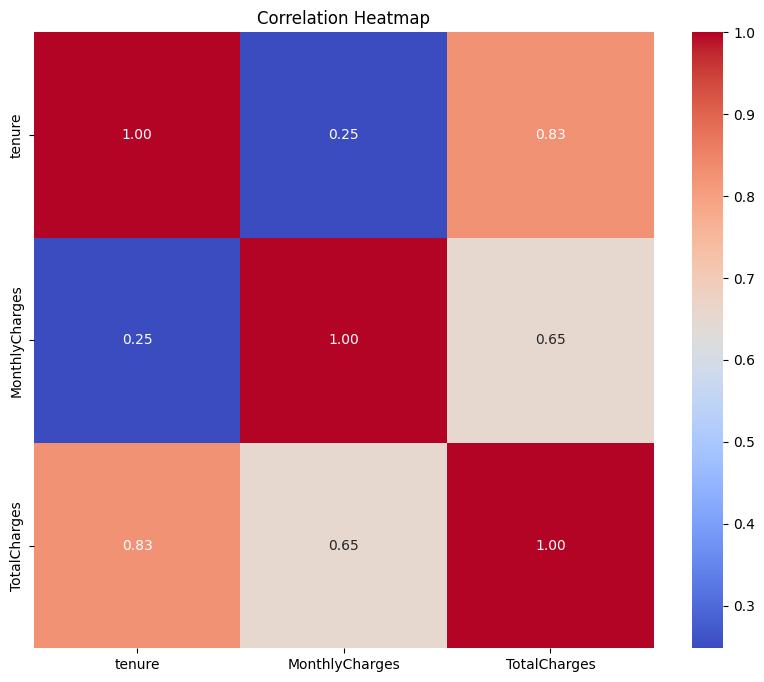

In [19]:
# Correlation Heatmaps for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# EDA Observations
1. Given dataset has 18 categorical columns and 3 numeric columns
2. CustomerID column is unique column, which basically has no pattern so it is not useful for churn prediction.
3.  No missing values for any column in given dataset
4. Total Charges column which is intially object datatype column, tried to convert to float64 but failed because of blank strings, so first blank strings are replaced with '0.0' because all the records with total charges as blank string has tenure as 0 so total charges with blank strings are replaced with '0.0' and then we converted total charges from object datatype to float64 datatype.
5. Looked at statistics for numeric columns, found total charges column has Mean >> Median which gave a clue for either presence of outliers or skew distribution.
6. The histogram plot for total charges column has confirmed it has a skew distribution.
7. Bar plots of categorical variables hepls us find that the target variable Churn has imbalance in data, the data is more biased towards No churn.
8. No outliers present in numeric columns of given dataset.
9. Total charges is high correlated with both tenure and monthly charges, generally total charges is been calculated as tenure multiplied by monthly charges.

**Step5: Clean the Data**

1. Drop irrevalant or duplicate data ✅
2. Fix incorrect or invalid values ✅
3. Handling Missing values - No missing values
4. Handling Outliers - No outliers

**Step6: Feature Engineering**

In [20]:
print("Skew before log:", df['TotalCharges'].skew())


Skew before log: 0.963234654832277


In [21]:
df['TotalCharges_logtransformed']=np.log1p(df['TotalCharges'])
print("Skew before log:", df['TotalCharges_logtransformed'].skew())


Skew before log: -0.8244577693814903


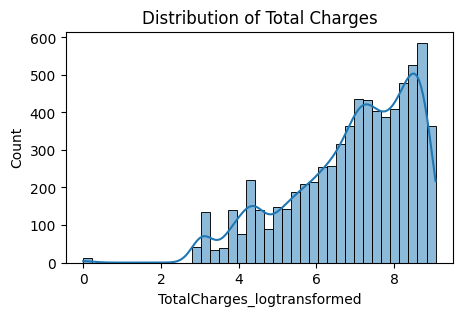

In [22]:
plt.figure(figsize=(5,3))
sns.histplot(df['TotalCharges_logtransformed'], kde=True)
plt.title(f"Distribution of Total Charges")
plt.show()

In [23]:
df.drop(columns=['TotalCharges_logtransformed'], inplace=True)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


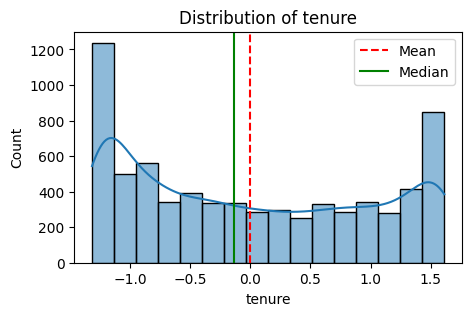

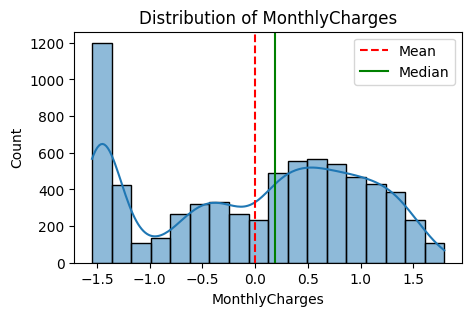

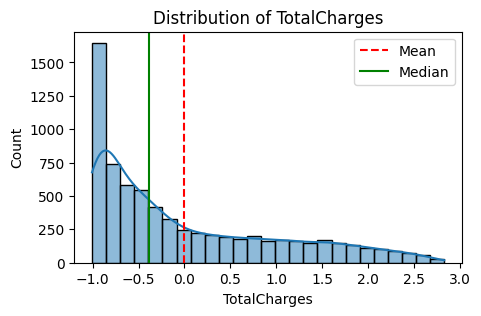

In [25]:
for column_name in numeric_features:
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean=df[column_name].mean()
  col_median=df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()
  plt.show()

As a feature engineering step for numeric columns, we had standardised the data and also done log transformation on TotalCharges as it was skewed previously

In [26]:
# Save the fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


OneHot Encoding for categorical fetaures

In [27]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply one-hot encoding
for column in categorical_features:
  if column != "SeniorCitizen":
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = one_hot_encoder.fit_transform(df[[column]])

    # Create DataFrame with new column names
    encoded_df = pd.DataFrame(
        encoded,
        columns=[f"{column}_{cat}" for cat in one_hot_encoder.categories_[0]],
        index=df.index
    )

    # Drop original column and concatenate encoded columns
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([df, encoded_df], axis=1)

    # Save encoder
    encoders[column] = one_hot_encoder

# Save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [28]:
encoders

{'gender': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'Partner': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'Dependents': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'PhoneService': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'MultipleLines': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'InternetService': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'OnlineSecurity': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'OnlineBackup': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'DeviceProtection': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'TechSupport': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'StreamingTV': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'StreamingMovies': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'Contract': OneHotEncoder(handle_unknown='ignore', sparse_output=

In [29]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [30]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0.066327,-0.259629,-0.172165,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-1.236724,-0.362660,-0.958066,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.514251,-0.746535,-0.193672,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,-1.236724,0.197365,-0.938874,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,1.613701,1.277533,2.242606,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,-0.870241,-1.168632,-0.852932,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1,-1.155283,0.320338,-0.870513,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Model Training


In [31]:
# Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split (Stratified to preserve target distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [32]:
over = SMOTE(sampling_strategy=0.8, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

# Create pipeline
resample_pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply to training data
X_res, y_res = resample_pipeline.fit_resample(X_train, y_train)

# Check result
print("Class distribution before resampling:")
print(pd.Series(y_train).value_counts())
# Check result
print("Class distribution after resampling:")
print(pd.Series(y_res).value_counts())

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)
# # Check result
# print("Class distribution before resampling:")
# print(pd.Series(y_train).value_counts())
# # Check result
# print("Class distribution after resampling:")
# print(pd.Series(y_res).value_counts())


Class distribution before resampling:
Churn
0    4139
1    1495
Name: count, dtype: int64
Class distribution after resampling:
Churn
0    3311
1    3311
Name: count, dtype: int64


In [33]:

# Define models
models = {
    # "Logistic Regression": LogisticRegression(max_iter=1000),
    # "Naive Bayes": GaussianNB(),
    # "SVM": SVC(probability=True),
    # "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    # "AdaBoost": AdaBoostClassifier(),
    # "Gradient Boost": GradientBoostingClassifier(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Results storage
results = []

# Initialize psutil for memory tracking
process = psutil.Process(os.getpid())

# Evaluate models
for name, model in models.items():
    print(f"Evaluating: {name}")

    # Start time
    start_time = time.time()

    # Track memory usage before training
    mem_before = process.memory_info().rss / 1024 ** 2  # in MB

    # Scoring
    acc = cross_val_score(model, X_res, y_res, scoring='accuracy', cv=cv).mean()
    prec = cross_val_score(model, X_res, y_res, scoring='precision', cv=cv).mean()
    rec = cross_val_score(model, X_res, y_res, scoring='recall', cv=cv).mean()
    f1 = cross_val_score(model, X_res, y_res, scoring='f1', cv=cv).mean()
    auc = cross_val_score(model, X_res, y_res, scoring='roc_auc', cv=cv).mean()

    # Track memory usage after training
    mem_after = process.memory_info().rss / 1024 ** 2  # in MB

    # End time
    end_time = time.time()
    train_time = end_time - start_time
    mem_used = mem_after - mem_before

    # Save results
    results.append((name, acc, prec, rec, f1, auc, train_time, mem_used))

    # Print summary
    print(f"{name}\n"
          f"  Accuracy:     {acc:.4f}\n"
          f"  Precision:    {prec:.4f}\n"
          f"  Recall:       {rec:.4f}\n"
          f"  F1 Score:     {f1:.4f}\n"
          f"  AUC:          {auc:.4f}\n"
          f"  Train Time:   {train_time:.2f} sec\n"
          f"  Memory Used:  {mem_used:.2f} MB\n"
          f"{'-'*40}")


Evaluating: Random Forest
Random Forest
  Accuracy:     0.8336
  Precision:    0.8282
  Recall:       0.8390
  F1 Score:     0.8362
  AUC:          0.9080
  Train Time:   24.08 sec
  Memory Used:  8.43 MB
----------------------------------------


So Random Forest has high accuracy without any hyperparameter tuning, Further  we can try hyperparameter tuning on Random Forests and see if we can increase recall(reduce FN)

In [34]:
rfc = RandomForestClassifier(random_state=42)

In [39]:
# Normal Training
rfc.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [36]:
# Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None],
    # 'class_weight': [None, 'balanced']
}
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=20,  # Number of combinations to try
    cv=5,  # StratifiedKFold is used internally by default
    scoring='f1',  # You can change to 'roc_auc' or 'accuracy'
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
random_search.fit(X_res, y_res)

# Best model after tuning
best_rf = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [37]:
print(y_test.value_counts())

Churn
0    1035
1     374
Name: count, dtype: int64


Model Evaluation

In [53]:
# evaluate on test data
# y_test_pred = rfc.predict(X_test)
y_test_pred = best_rf.predict(X_test)

# print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
# print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))
# print("Untuned Accuracy:", accuracy_score(y_test, rfc.predict(X_test)))
# print("Tuned Accuracy:", accuracy_score(y_test, best_rf.predict(X_test)))

print("Untuned F1:", confusion_matrix(y_test, rfc.predict(X_test)))
print("Tuned F1:", confusion_matrix(y_test, best_rf.predict(X_test)))
print('-'*50)
print("Untuned F1:", f1_score(y_test, rfc.predict(X_test)))
print("Tuned F1:", f1_score(y_test, best_rf.predict(X_test)))
print('-'*50)
print("Untuned Recall:", recall_score(y_test, rfc.predict(X_test)))
print("Tuned Recall:", recall_score(y_test, best_rf.predict(X_test)))
print('-'*50)
print("Untuned Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Tuned Precision:", precision_score(y_test, best_rf.predict(X_test)))
print('-'*50)
print("Untuned AUC:", roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))
print("Tuned AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))


Untuned F1: [[862 173]
 [155 219]]
Tuned F1: [[835 200]
 [129 245]]
--------------------------------------------------
Untuned F1: 0.5718015665796344
Tuned F1: 0.5982905982905983
--------------------------------------------------
Untuned Recall: 0.5855614973262032
Tuned Recall: 0.6550802139037433
--------------------------------------------------
Untuned Precision: 0.5586734693877551
Tuned Precision: 0.550561797752809
--------------------------------------------------
Untuned AUC: 0.8178369371464
Tuned AUC: 0.8292167196259268


Hurray with Hyperparameter tuning we have improved F1 and recall metrics though very little drop in accuracy and precision, we made significant increase in F1 and recall which means FN reduced

In [54]:
import numpy as np
import pandas as pd

# Reconstruct test set with predictions
X_test_copy = X_test.copy()
X_test_copy['y_actual'] = y_test.values
X_test_copy['y_predicted'] = y_test_pred

# Load scaler to inverse transform numeric columns
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_test_copy[numeric_cols] = scaler.inverse_transform(X_test_copy[numeric_cols])


# Filter True Positives (actual = 1, predicted = 1)
true_positives = X_test_copy[(X_test_copy['y_actual'] == 1) & (X_test_copy['y_predicted'] == 1)]

# Display selected columns
tp_table = true_positives[['TotalCharges', 'y_actual', 'y_predicted']]
print(tp_table.shape)

# Calculate total revenue saved
total_revenue_saved = tp_table['TotalCharges'].sum()
print(f"\n✅ Estimated Revenue Saved: ₹{total_revenue_saved:,.2f}")


(245, 3)

✅ Estimated Revenue Saved: ₹237,836.60


Estimated Revenue Saved: ₹199,963.10 before Hyperparameter Tuning

Estimated Revenue Saved: ₹237,836.60 after Hyperparameter Tuning

In [55]:
# save the trained model as a pickle file
model_data = {"model": best_rf, "features_names": X.columns.tolist()}
with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [56]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [57]:
print(loaded_model)

RandomForestClassifier(min_samples_leaf=2, random_state=42)


In [58]:
print(feature_names)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit 

In [59]:
import pandas as pd
import numpy as np
import pickle

# STEP 1: Incoming new data (raw user input)
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_df = pd.DataFrame([input_data])
# STEP 2: Load scaler and scale numeric features
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

# STEP 3: Load encoders and apply OneHotEncoding to categorical columns
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Apply OneHotEncoding
encoded_parts = []
for col, encoder in encoders.items():
    encoded = encoder.transform(input_df[[col]])
    encoded_df = pd.DataFrame(
        encoded,
        columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
        index=input_df.index
    )
    encoded_parts.append(encoded_df)

# Remove original categorical columns
input_df.drop(columns=encoders.keys(), inplace=True)

# Concatenate encoded columns with input_df
input_df = pd.concat([input_df] + encoded_parts, axis=1)

# STEP 5: Load model and feature names
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

model = model_data["model"]
feature_names = model_data["features_names"]

# STEP 6: Match input column order to training data
for col in feature_names:
    if col not in input_df.columns:
        input_df[col] = 0  # add missing columns
input_df = input_df[feature_names]

# STEP 7: Make prediction
prediction = model.predict(input_df)
probability = model.predict_proba(input_df) # probability of churn (class=1)

# STEP 8: Output result
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {probability}")


Prediction: No Churn
Prediciton Probability: [[0.60211212 0.39788788]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')